In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Open e-bike_articles csv 
# Read the csv file and print the first 5 rows
df_e_bike = pd.read_csv('e-bike_articles.csv')
df_bike = pd.read_csv('bike_articles.csv')
print(df_e_bike.head())
print(df_bike.head())



                                                 url        date  \
0  https://www.gelderlander.nl/112-nieuws-veenend...  04/11/2024   
1  https://www.ad.nl/arnhem/automobilist-botst-op...  01/11/2024   
2  https://www.ad.nl/112-nieuws-den-haag/twee-gew...  27/10/2024   
3  https://www.ad.nl/ede/fatbiker-gewond-bij-onge...  27/10/2024   
4  https://www.ad.nl/112-nieuws-apeldoorn/ongeval...  25/10/2024   

                                            articles  \
0  De man raakte op de Dr. Colijnstraat in Veenen...   
1  De persoon op de fatbike werd aan de Rosendaal...   
2  00:51\nTwee meisjes op fatbike hard ten val na...   
3  De fatbiker raakte gewond tijdens het overstek...   
4  De fatbike raakte ligt beschadigd. Â© Luciano ...   

                                    cleaned_articles  
0  De man raakte op de Dr  Colijnstraat in Veenen...  
1  De persoon op de fatbike werd aan de Rosendaal...  
2   Twee meisjes op fatbike hard ten val na botsi...  
3  De fatbiker raakte gewond tijde

In [3]:
# Create a plot of the number of articles per month

# Convert the 'date' column to datetime format
df_bike['date'] = pd.to_datetime(df_bike['date'], errors='coerce')

# # Drop rows with invalid dates
# df_bike = df_bike.dropna(subset=['date'])

# Extract the month and year from the date
df_bike['year_month'] = df_bike['date'].dt.to_period('M')

# Count the number of articles per month
articles_per_month = df_bike['year_month'].value_counts().sort_index()

# Convert the 'date' column to datetime format for e-bike articles
df_e_bike['date'] = pd.to_datetime(df_e_bike['date'], errors='coerce')

# Extract the month and year from the date for e-bike articles
df_e_bike['year_month'] = df_e_bike['date'].dt.to_period('M')

# Count the number of e-bike articles per month
e_bike_articles_per_month = df_e_bike['year_month'].value_counts().sort_index()

# Get the union of both indices
all_months = articles_per_month.index.union(e_bike_articles_per_month.index)

# Reindex both DataFrames
articles_per_month = articles_per_month.reindex(all_months, fill_value=0)
e_bike_articles_per_month = e_bike_articles_per_month.reindex(all_months, fill_value=0)

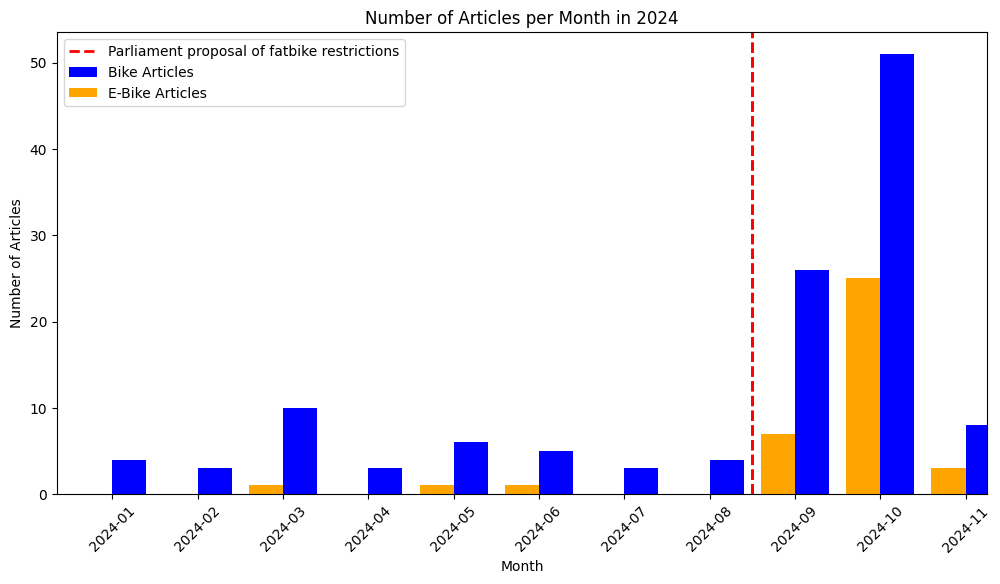

In [4]:
# Filter the data for the year 2024
articles_2024 = articles_per_month[articles_per_month.index.year == 2024]
e_bike_articles_2024 = e_bike_articles_per_month[e_bike_articles_per_month.index.year == 2024]

# Plot the number of articles per month for 2024
ax_2024 = articles_2024.plot(kind='bar', figsize=(12, 6), color='blue', position=0, width=0.4, label='Bike Articles')
e_bike_articles_2024.plot(kind='bar', figsize=(12, 6), color='orange', position=1, width=0.4, label='E-Bike Articles', ax=ax_2024)

# Add a line at the time that the Dutch parliament started talking about a ban on fatbikes for people under 14
plt.axvline(x=7.5, color='red', linewidth=2, linestyle='--')

# Add a line at the time that the Dutch parliament started talking about a ban on fatbikes for people under 14
red_line = plt.axvline(x=7.5, color='red', linewidth=2, linestyle='--', label='Parliament proposal of fatbike restrictions')

plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.title('Number of Articles per Month in 2024')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [16]:
import warnings
from sklearn.feature_extraction.text import CountVectorizer
warnings.filterwarnings("ignore")

from bertopic import BERTopic

def analyze_topics(texts):

    vectorizer_model = CountVectorizer(stop_words='english')
    model_e_bikes = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7, vectorizer_model=vectorizer_model) # Different model, because we are using a different language
    topics, _ = model_e_bikes.fit_transform(texts)
    
    freq = model_e_bikes.get_topic_info()
    print("Number of topics: {}".format( len(freq)))
    display(freq.head(20))
    return model_e_bikes,topics

########
## YOUR PREPROCESSING CODE HERE
########

df_e_trans = pd.read_csv("etrans.csv")
model_e_bikes,topics = analyze_topics(df_e_trans['translated_article'].astype(str))
df_e_trans['topic'] = topics # This links the topic back to our dataframe, so we know what topic each tweet was characterized as

2024-12-10 14:49:52,828 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

2024-12-10 14:49:57,194 - BERTopic - Embedding - Completed ✓
2024-12-10 14:49:57,198 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-12-10 14:49:57,601 - BERTopic - Dimensionality - Completed ✓
2024-12-10 14:49:57,604 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-12-10 14:49:57,732 - BERTopic - Cluster - Completed ✓
2024-12-10 14:49:57,778 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-12-10 14:49:57,948 - BERTopic - Representation - Completed ✓


Number of topics: 4


,Topic,Count,Name,Representation,Representative_Docs
0,-1,11,-1_hospital_ambulance_boy_accident,"[hospital, ambulance, boy, accident, injured, ...",[Things went wrong in Ede on Wednesday afterno...
1,0,24,0_fat_car_injured_collision,"[fat, car, injured, collision, biker, accident...",[An electric cyclist was injured after a colli...
2,1,13,1_woman_bike_injured_accident,"[woman, bike, injured, accident, car, year, ol...",[Ambulance personnel look over the unfortunate...
3,2,7,2_accident_cause_bike_24,"[accident, cause, bike, 24, known, 10, fat, de...",[The cause of the accident is not yet known AS...


In [17]:
model_e_bikes.visualize_barchart()

In [18]:
def analyze_topics(texts):

    vectorizer_model = CountVectorizer(stop_words='english')
    model = BERTopic(verbose=True,embedding_model='paraphrase-MiniLM-L3-v2', min_topic_size= 7, vectorizer_model=vectorizer_model) # Different model, because we are using a different language
    topics, _ = model.fit_transform(texts)
    
    freq = model.get_topic_info()
    print("Number of topics: {}".format( len(freq)))
    display(freq.head(20))
    return model,topics

########
## YOUR PREPROCESSING CODE HERE
########

df_e_trans = pd.read_csv("tradtransog.csv")
model,topics = analyze_topics(df_e_trans['translated_article'].astype(str))
df_e_trans['topic'] = topics # This links the topic back to our dataframe, so we know what topic each tweet was characterized as

2024-12-10 14:50:40,898 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/24 [00:00<?, ?it/s]

2024-12-10 14:51:08,665 - BERTopic - Embedding - Completed ✓
2024-12-10 14:51:08,667 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-12-10 14:51:16,176 - BERTopic - Dimensionality - Completed ✓
2024-12-10 14:51:16,179 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-12-10 14:51:16,701 - BERTopic - Cluster - Completed ✓
2024-12-10 14:51:16,727 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-12-10 14:51:17,147 - BERTopic - Representation - Completed ✓


Number of topics: 22


,Topic,Count,Name,Representation,Representative_Docs
0,-1,278,-1_cyclist_injured_hospital_collision,"[cyclist, injured, hospital, collision, accide...",[A woman was seriously injured in an accident ...
1,0,87,0_died_year_old_accident,"[died, year, old, accident, police, truck, col...",[Woman seriously injured on the street after a...
2,1,35,1_accident_helicopter_trauma_cyclist,"[accident, helicopter, trauma, cyclist, ambula...",[The vehicle with which the cyclist collided w...
3,2,33,2_car_injured_seriously_collision,"[car, injured, seriously, collision, cyclist, ...",[A cyclist was injured in a collision with a c...
4,3,28,3_wageningen_cyclist_112_injured,"[wageningen, cyclist, 112, injured, collision,...",[Cyclist injured after collision with car in W...
5,4,28,4_zwolle_collision_injured_cyclist,"[zwolle, collision, injured, cyclist, car, hos...",[A cyclist was injured in the collision at the...
6,5,26,5_deventer_hulman_rens_collision,"[deventer, hulman, rens, collision, injured, c...","[After the collision, the cyclist had to go to..."
7,6,24,6_child_hit_bicycle_ommen,"[child, hit, bicycle, ommen, children, police,...",[A young cyclist was hit by a car on the Lebui...
8,7,23,7_doetinchem_cyclist_injured_ronvmedia,"[doetinchem, cyclist, injured, ronvmedia, edit...","[After the collision, the cyclist had to be ta..."
9,8,23,8_scooter_rider_moped_injured,"[scooter, rider, moped, injured, collision, ho...",[Two ambulances at the De Knoop intersection i...


In [19]:
model.visualize_barchart()

In [5]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.4 kB ? eta -:--:--
   ---------------------------------------- 300.4/300.4 kB 9.4 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


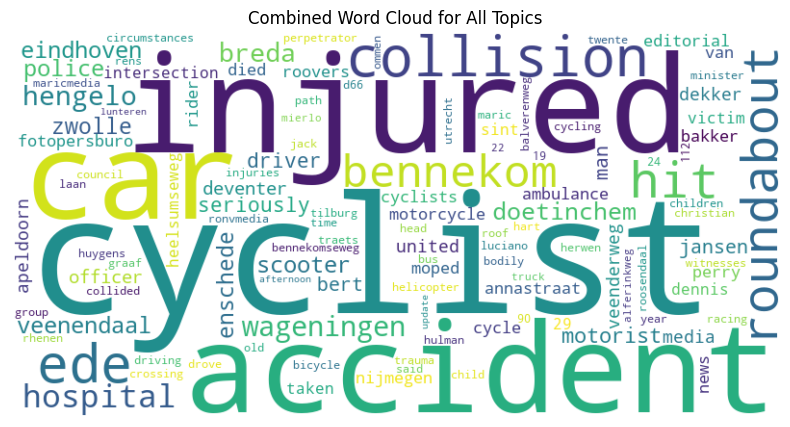

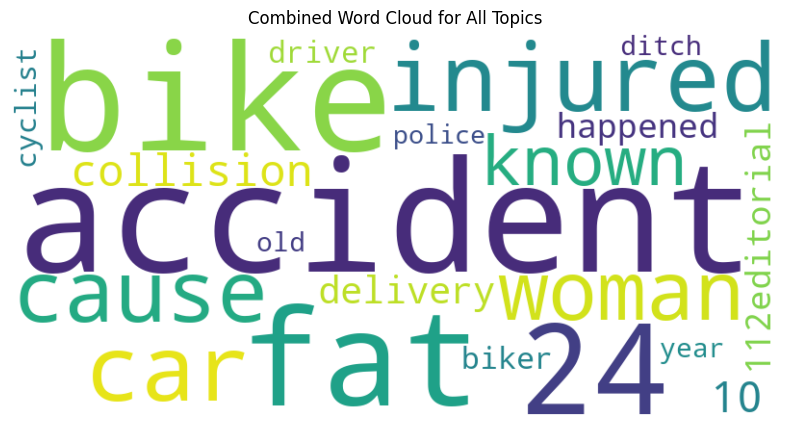

In [20]:
from wordcloud import WordCloud
from collections import Counter

# Generate a combined word cloud for all topics
def generate_combined_wordcloud(model):
    """
    Generate a single word cloud for all topics combined from a BERTopic model.

    Parameters:
    - model: BERTopic model instance.
    """
    all_words = Counter()  # Initialize a counter to aggregate words

    # Iterate through all topics, skipping outliers (-1)
    topic_info = model.get_topic_info()
    for _, row in topic_info.iterrows():
        topic_id = row['Topic']
        if topic_id == -1:  # Skip outliers
            continue
        
        topic_words = dict(model.get_topic(topic_id))
        all_words.update(topic_words)  # Merge words and their weights

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(all_words)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Combined Word Cloud for All Topics")
    plt.show()

# Generate the combined word cloud for your model
try:
    generate_combined_wordcloud(model)
    generate_combined_wordcloud(model_e_bikes)
except Exception as e:
    print(f"An error occurred: {e}")

                                      cleaned_articles  severity_score
610  ALMELO   Rechtbank Almelo  meervoudige kamer b...        0.000000
353  PREMIUM Floris van Mulligen kwam om het leven ...        0.000000
619  PREMIUM Ter illustratie    ANP XTRA OM wil cel...        0.000000
497  De pagina kon niet worden gevonden Sorry  deze...        0.000000
27     Twee manieren om verder te lezen  Log in en ...        0.000000
714  Stadsbus rijdt over fiets in Breda   Tom van d...        0.033079
116  Zo troffen de eigenaren hun tweewieler aan    ...        0.033079
23   Fietser en auto botsen op kruising Walstraat m...        0.035623
274  Foto ter illustratie    Carlo ter Ellen DPG Me...        0.045802
63     Egberts Media Automobilist  22  crasht door ...        0.045802
Average Severity Score: 0.17
                                     cleaned_articles  severity_score
41  Een beeld uit de uitzending van Onder de loep ...        0.040712
51     AS Media Vrouw en kind op e bike geschept d

C:\Users\Jacco\AppData\Local\Temp\ipykernel_76696\2888753146.py:77: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_e_bike['date'] = pd.to_datetime(df_e_bike['date'], errors='coerce')


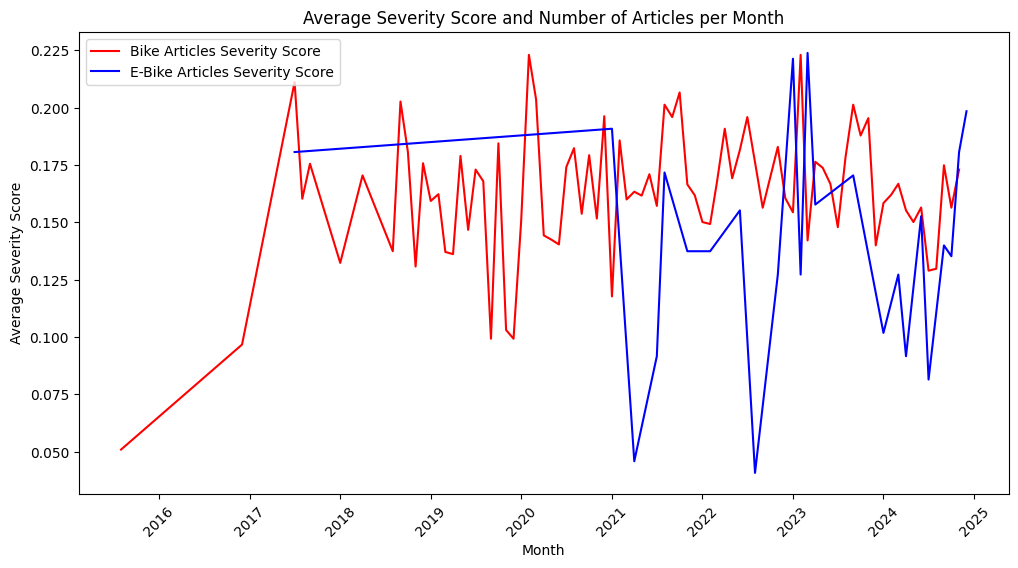

In [4]:
# Based on ChatGPT, this is a list of keywords that indicate the severity of an incident
severity_keywords = {
    'gewond': 0.9,
    'hard ten val': 0.8,
    'botsing': 0.7,
    'overleden': 1.0,
    'ongeluk': 0.9,
    'beschadigd': 0.4,
    'probleem': 0.3,
    'gevaarlijk': 0.5,
    'dodelijk': 1.0,
    'ernstige verwondingen': 0.95,
    'crash': 0.9,
    'flinke botsing': 0.85,
    'letsel': 0.85,
    'aangereden': 0.9,
    'omgekomen': 1.0,
    'zwaar gewond': 0.95,
    'ziekenhuis': 0.9,

    # Medium Severity (0.4–0.7)
    'verkeersongeluk': 0.6,
    'gevaarlijke situatie': 0.5,
    'lichte verwondingen': 0.6,
    'schade': 0.5,
    'valpartij': 0.7,
    'aanrijding': 0.65,
    'verwarde bestuurder': 0.5,

    # Low Severity (0.1–0.4)
    'lichte schade': 0.3,
    'onhandige situatie': 0.2,
    'kleine botsing': 0.4,
    'technisch probleem': 0.3,
    'verkeersopstopping': 0.1,
    'onduidelijk incident': 0.2,
    'voertuigpech': 0.3
}

# Calculate the severity score of the articles
def calculate_severity_score(text):
    score = 0
    for word, value in severity_keywords.items():
        if word in text:
            score += value
    # Normalize the score to be between 0 and 1
    max_score = sum(severity_keywords.values())
    return score / max_score

# Apply the function to the articles
df = pd.read_csv('bike_articles.csv')
df['severity_score'] = df['cleaned_articles'].astype(str).apply(calculate_severity_score)
print(df[['cleaned_articles', 'severity_score']].sort_values(by='severity_score', ascending=True).head(10))


# Get the average severity score of all articles
average_severity_score = df['severity_score'].mean()
print("Average Severity Score: {:.2f}".format(average_severity_score))

# Apply the function to the articles
df_e_bike = pd.read_csv('e-bike_articles.csv')
df_e_bike['severity_score'] = df_e_bike['cleaned_articles'].astype(str).apply(calculate_severity_score)
print(df_e_bike[['cleaned_articles', 'severity_score']].sort_values(by='severity_score', ascending=True).head(10))


# Get the average severity score of all articles
average_severity_score_e_bike = df_e_bike['severity_score'].mean()
print("Average Severity Score: {:.2f}".format(average_severity_score))

# Plot this severity score over time, using the 'date' column
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year_month'] = df['date'].dt.to_period('M')
severity_score_per_month = df.groupby('year_month')['severity_score'].mean()
# Plot average severity score over time for e-bike articles
df_e_bike['date'] = pd.to_datetime(df_e_bike['date'], errors='coerce')
df_e_bike['year_month'] = df_e_bike['date'].dt.to_period('M')
severity_score_per_month_e_bike = df_e_bike.groupby('year_month')['severity_score'].mean()
# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot severity score for bike articles
ax1.plot(severity_score_per_month.index.to_timestamp(), severity_score_per_month, 'r-', label='Bike Articles Severity Score')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Severity Score')
ax1.tick_params(axis='y')

# Plot severity score for e-bike articles
ax1.plot(severity_score_per_month_e_bike.index.to_timestamp(), severity_score_per_month_e_bike, 'b-', label='E-Bike Articles Severity Score')
ax1.legend(loc='upper left')

plt.title('Average Severity Score and Number of Articles per Month')
plt.xticks(rotation=45)
plt.show()

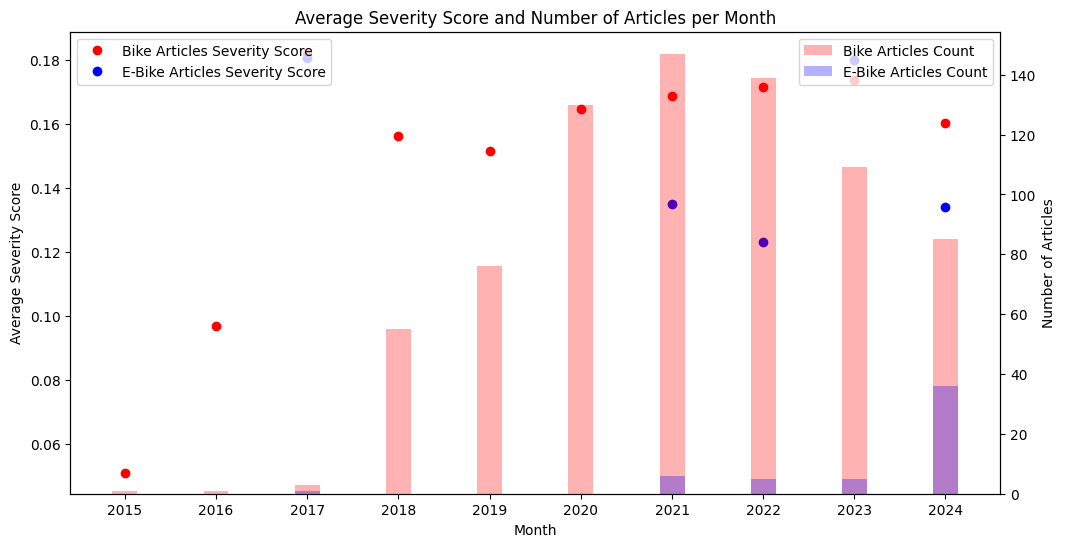

In [42]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['year_month'] = df['date'].dt.to_period('Y')
severity_score_per_month = df.groupby('year_month')['severity_score'].mean()
# Plot average severity score over time for e-bike articles
df_e_bike['date'] = pd.to_datetime(df_e_bike['date'], errors='coerce')
df_e_bike['year_month'] = df_e_bike['date'].dt.to_period('Y')
severity_score_per_month_e_bike = df_e_bike.groupby('year_month')['severity_score'].mean()
# Plot the data
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot severity score for bike articles
ax1.plot(severity_score_per_month.index.to_timestamp(), severity_score_per_month, 'ro', label='Bike Articles Severity Score')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Severity Score')
ax1.tick_params(axis='y')

# Plot severity score for e-bike articles
ax1.plot(severity_score_per_month_e_bike.index.to_timestamp(), severity_score_per_month_e_bike, 'bo', label='E-Bike Articles Severity Score')
ax1.legend(loc='upper left')

# Create a second y-axis to plot the number of articles
ax2 = ax1.twinx()
articles_per_month = df['year_month'].value_counts().sort_index()
e_bike_articles_per_month = df_e_bike['year_month'].value_counts().sort_index()

# Plot number of articles for bike articles
ax2.bar(articles_per_month.index.to_timestamp(), articles_per_month, color='red', alpha=0.3, label='Bike Articles Count', width=100)
ax2.set_ylabel('Number of Articles', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Plot number of articles for e-bike articles
ax2.bar(e_bike_articles_per_month.index.to_timestamp(), e_bike_articles_per_month, color='blue', alpha=0.3, label='E-Bike Articles Count', width=100)
ax2.legend(loc='upper right')

plt.title('Average Severity Score and Number of Articles per Month')
plt.xticks(rotation=45)
plt.show()